In [1]:
import numpy as np
import pandas as pd 
import math
import statistics as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


#   1)  MEAN


In statistics, it is a measure of central tendency of a probability distribution along median and mode. It is also referred to as an expected value.


To find the mean, we need to:

1.Find the total of all the numbers


2.Then divide by the amount of numbers


FORMULA-

$ mean = \sum  \frac{x}{n}  $

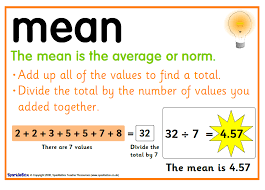

In [10]:
#Caluclating mean without library function
def my_mean(sample):
        return sum(sample) / len(sample)
my_mean(data['Mthly_HH_Income'])

41558.0

In [11]:
#Caluclating mean with library function
np.mean(data['Mthly_HH_Income'])

41558.0

#  2) Median

The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).

To find the median, we need to:

1.Sort the sample


2.Locate the value in the middle of the sorted sample

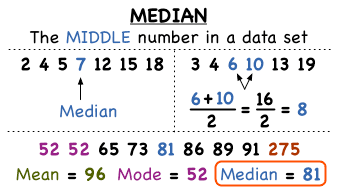

FORMULA-

$$ Median = \frac{n+1}{2}$$

In [14]:
#Caluclating median without library function
def my_median(sample):
    n = len(sample)
    index = n // 2
    # Sample with an odd number of observations
    if n % 2:
        return sorted(sample)[index]
   # Sample with an even number of observations
    return sum(sorted(sample)[index - 1:index + 1]) / 2

In [15]:
my_median(data['Mthly_HH_Income'])

35000.0

In [16]:
#Caluclating median with library function
np.median(data['Mthly_HH_Income'])

35000.0

# 3) Mode


The most frequent number—that is, the number that occurs the highest number of times.

The mode is the most frequent observation (or observations) in a sample.

If we have the sample [4, 1, 2, 2, 3, 5], then its mode is 2 because 2 appears two times in the sample whereas the other elements only appear once.
\ The mode doesn't have to be unique.

Some samples have more than one mode. Say we have the sample [4, 1, 2, 2, 3, 5, 4].
This sample has two modes - 2 and 4 because they're the values that appear more often and both appear the same number of times.

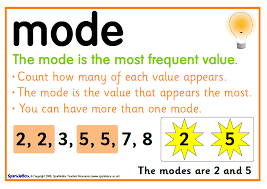

Formula- 

$$ Mode = 3(median) - 2(mode) $$

In [26]:
#Caluclating mode without library function
from collections import Counter

def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

In [27]:
print(my_mode(data['Highest_Qualified_Member']))
my_mode(data['Mthly_HH_Income'])

['Graduate']


[45000]

In [28]:
#Caluclating mode with library function
x=stats.mode(data['Highest_Qualified_Member'])
y=stats.mode(data['Mthly_HH_Income'])
print("Mode of Highest_Qualified_Member :",x)
print("Mode of Mthly_HH_Income :",y)

Mode of Highest_Qualified_Member : Graduate
Mode of Mthly_HH_Income : 45000


# 4) Variance


The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set. 

It tells you about the collection’s degree of dispersion. 

Formula-

$$ \sigma ^2 = \sum  \frac{(x - \mu)^2}{n} $$

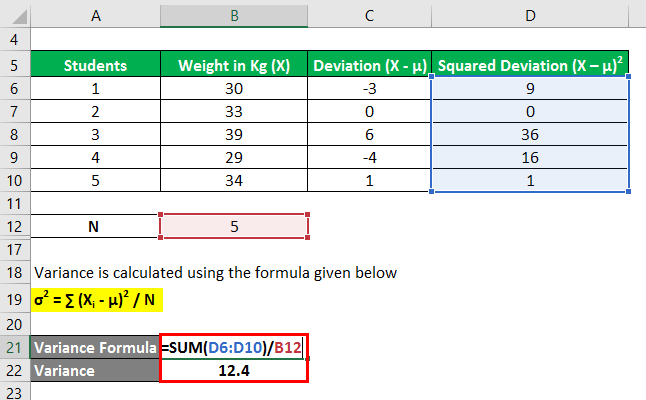

In [29]:
#Caluclating variance without library function 
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

In [30]:
variance(data['Annual_HH_Income'])

100437186889.95831

In [31]:
#Caluclating variance with library function 
stats.pvariance(data['Annual_HH_Income'])

100437186889.95839

In [32]:
stats.variance(data['Annual_HH_Income']) 
#That's because variance() uses n - 1 instead of n to calculate the variance

102486925397.91672

# 5) Standard Deviation

The Standard Deviation is a measure of how spread out numbers are.

Its symbol is σ (the greek letter sigma)

The formula is easy: it is the square root of the Variance. 

Formula- 

$$ \sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2} $$

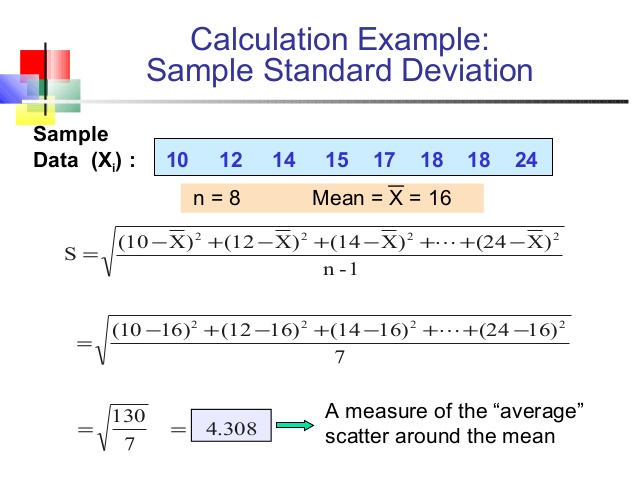

In [33]:
#Caluclating standard devition without library function

def stdev(data):
    # We relay on our previous implementation for the variance
    return math.sqrt(variance(data))

In [34]:
stdev(data['Annual_HH_Income'])

316918.26531451027

In [35]:
#Caluclating standard devition with library function
stats.stdev(data['Annual_HH_Income'])

320135.7921225253

In [36]:
stats.pstdev(data['Annual_HH_Income'])

316918.2653145104

# 6) Correlation

Correlation is a statistic that measures the degree to which two variables move in relation to each other.

The strength and directional association of the relationship between two variables are defined by correlation and it ranges from -1 to +1.

 Similar to covariance, a positive value denotes that both variables move in the same direction whereas a negative value tells us that they move in opposite directions.

 The most widely used formula to compute correlation coefficient is Pearson's 'r' 

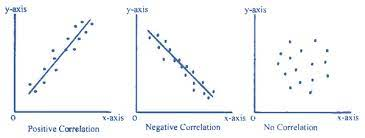

In [37]:
#Caluclating correlation without using library funstion
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return cor

In [38]:
x=data['Annual_HH_Income']
y=data['Mthly_HH_Expense']
correlation(x,y)

0.5912216295468027

In [39]:
#Calclating pairwise corelation using library function
data.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


<AxesSubplot:>

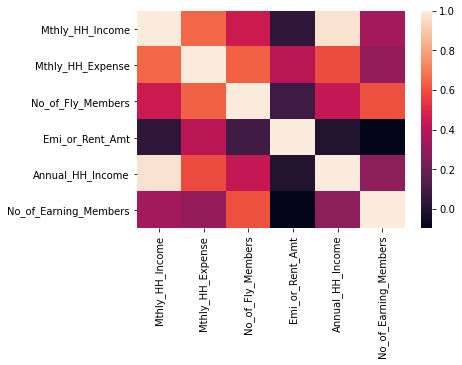

In [40]:
sns.heatmap(data.corr())

# 7) Normal Distribution


Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

The Normal distribution is commonly associated with the 68-95-99.7 rule :

68% of the data is within 1 standard deviation (σ) of the mean (μ)

P (µ - σ < X < µ + σ) = 0.68,


95% of the data is within 2 standard deviations (σ) of the mean (μ)

P (µ - 2σ < X < µ + 2σ) = 0.95 and


99.7% of the data is within 3 standard deviations (σ) of the mean (μ)

P(µ - 3σ < X < µ + 3σ) = 0.99




To be able to understand where the percentages come from, it is important to know about the probability density function (PDF)

PROBABILITY DENSITY FUNCTION-

$$ \frac1{\sqrt{2\pi\sigma^2}}{exp}^\frac{x-\mu}{\sigma} $$

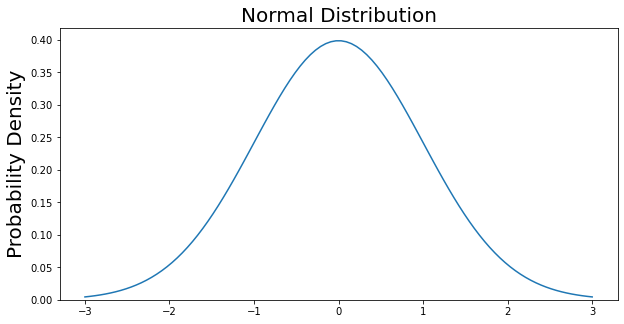

In [41]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

In [42]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -1 to 1
result, _ = quad(normalProbabilityDensity, -1, 1, limit = 1000)
print("Data Within 1 Standard Deviation : ",result ,'\n')
# Integrate PDF from -2 to 2
result, _ = quad(normalProbabilityDensity, -2, 2, limit = 1000)
print("Data Within 2 Standard Deviation : ",result ,'\n')
# Integrate PDF from -3 to 3
result, _ = quad(normalProbabilityDensity, -3, 3, limit = 1000)
print("Data Within 3 Standard Deviation : ",result ,'\n')

Data Within 1 Standard Deviation :  0.682689492137086 

Data Within 2 Standard Deviation :  0.9544997361036417 

Data Within 3 Standard Deviation :  0.9973002039367399 



# 8) Positively Skewed & Negatively Skewed Normal Distribution

What Is Skewness?


Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

If one tail is longer than another, the distribution is skewed.

These distributions are called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry

A has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.



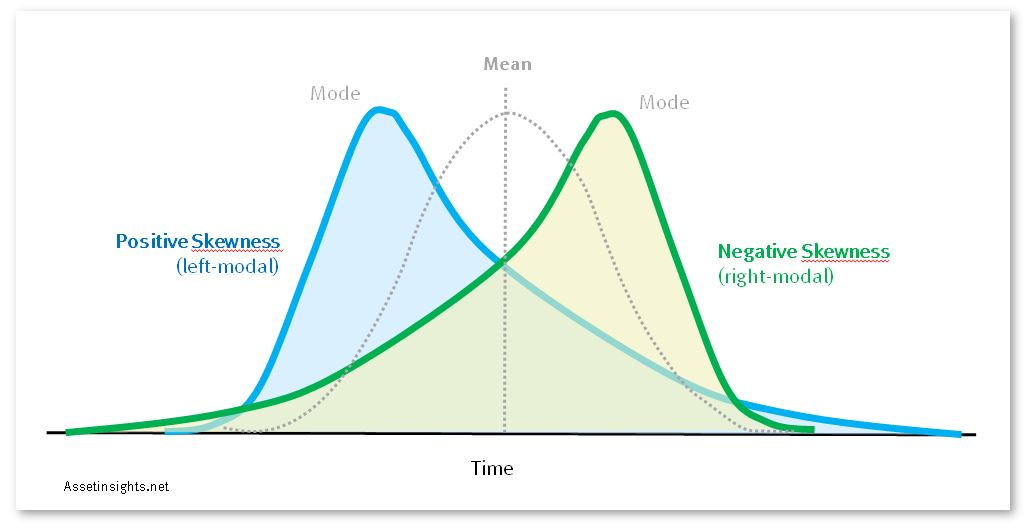

FORMULA-

$$ Skewness = \frac{mean - mode }{standard  deviation} $$

# 9) Effect on Mean, Median and Mode due to Skewness 

In a normal distribution, the mean and the median are the same number while the mean and median in a skewed distribution become different numbers:



A left-skewed, negative distribution will have the mean to the left of the median. 



A right-skewed distribution will have the mean to the right of the median

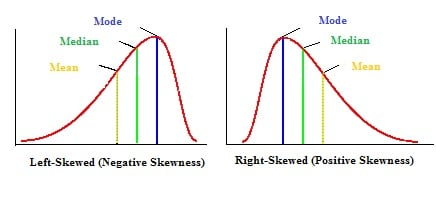

In [44]:
#Skewness in our data 
data.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

# 10) Q Q Plots (Quantile-Quantile plots)

In Statistics, Q-Q(quantile-quantile) plots play a very vital role to graphically analyze and compare two probability distributions by plotting their quantiles against each other.



 We plot the theoretical quantiles or basically known as the standard normal variate (a normal distribution with mean=0 and standard deviation=1)on the x-axis and the ordered values for the random variable which we want to find whether it is Gaussian distributed or not, on the y-axis. Which gives a very beautiful and a smooth straight line like structure from each point plotted on the graph




Now we have to focus on the ends of the straight line. If the points at the ends of the curve formed from the points are not falling on a straight line but indeed are scattered significantly from the positions then we cannot conclude a relationship between the x and y axes which clearly signifies that our ordered values which we wanted to calculate are not Normally distributed




If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot

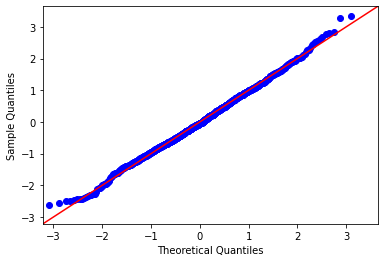

In [46]:
import statsmodels.api as sm

# Generate some normally distributed random numbers
random_normals = [np.random.normal() for i in range(1000)]

# Create QQ plot
sm.qqplot(np.array(random_normals), line='45')
plt.show()


See how our data (the blue dots) fall pretty cleanly on the red line? That means that our data is normally distributed (which we already knew). $$ \ $$ And that’s it.If our data adheres to the red 45 degree line, it’s normal or close to it, and if it does not, then it’s not normal.

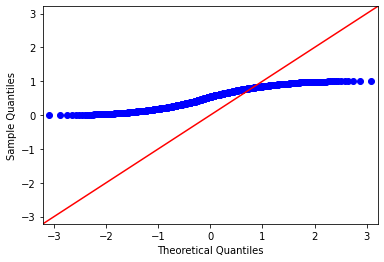

In [47]:

import random
# Generate some uniformly distributed random variables
random_uniform = [random.random() for i in range(1000)]
# Create QQ plot
sm.qqplot(np.array(random_uniform), line='45')
plt.show()


Our data (the blue dots) is nowhere close to the red line, meaning it’s not normally distributed.

# 11) Box-Cox Transformation 

When you are dealing with real-world data, you are going to deal with features that are heavily skewed.

The Box-Cox procedure tries find the best exponent to transform the data int to a normal shape. All the data in the data-set will be raised with this factor. $$ \ $$ In order to do this the Box-Cox transformation search in a range form $\lambda$ -10 to $\lambda$ 10 for the factor with the lowest spread.

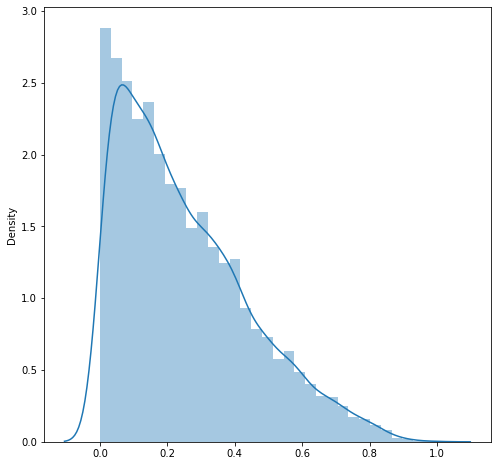

In [48]:
plt.figure(figsize = (8, 8))
data = np.random.beta(1, 3, 5000)
sns.distplot(data)
plt.show()

We can use the Box-Cox transformation to transform the above into as close to a normal distribution as the Box-Cox transformation permits.

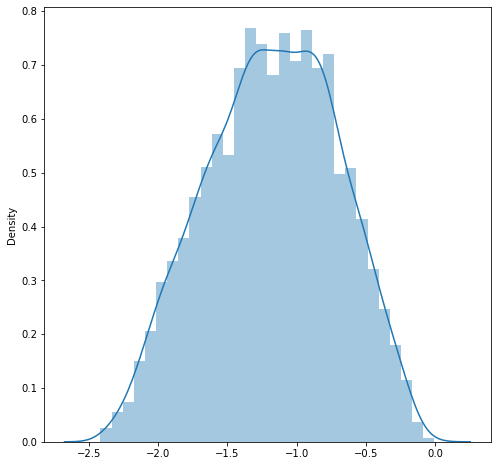

In [49]:
from scipy import stats
tdata = stats.boxcox(data)[0]
plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()